### **Name: Manuj Kumar Joshi**

### **Status : Intern**

### **Organisation : The Sparks Foundation**

### **Task 2 : Prediction using Unsupervised Learning**


<div class="alert alert-block alert-info" style="margin-top: 20px">
     Question : From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.
</div>

### **Approach: K-Means Clustering**

<h3>Step 1 : Importing the Libraries</h3>

In [22]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

<h3>Step 2 : Read the Iris Dataset</h3>

In [5]:
#read the iris Dataset
df=pd.read_csv('iris.csv')
df=df.drop(['Species','Id'],axis=1)  # drop Id and Species because Id is discrete variable and Species is which we are going to predict
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<h3>Step 3 : Now, we select all four features (sepal length, sepal width, petal length, and petal width) of the dataset in a variable called df_arr so that we can train our model and can plot a scatter plot with these features to see the pattern in the data</h3>

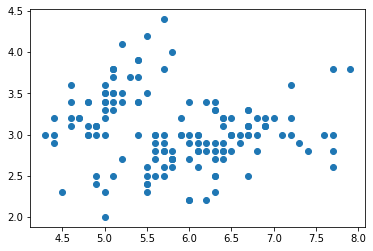

In [23]:
df_arr=np.asarray(df)
#Plot the scatter plot to see clusters are evident on the first two columns
plt.scatter(df_arr[:,0],df_arr[:,1])
plt.show()

<h3>Step 4 :  Finding the optimum number of clusters for k-means classification</h3>

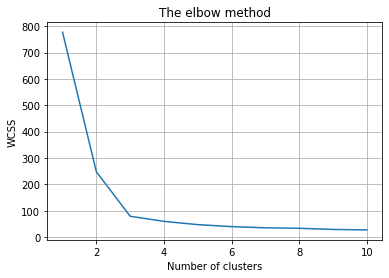

In [24]:

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_arr)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.grid()
plt.show()

In [25]:
for i in range(1,10):
    print(i,' ->',wcss[i])

1  -> 247.652503404007
2  -> 78.94084142614601
3  -> 59.4381655761024
4  -> 47.07446112266113
5  -> 39.47761881496882
6  -> 35.07013782714871
7  -> 33.20837943918827
8  -> 28.79485002742355
9  -> 27.037875152625148


<h3>As we can see, the optimal value of k is between 2 and 4, as the elbow-like shape is formed at k=3 in the above graph. Let’s implement k-means using k=3</h3>

<h3>Step 5 :  Applying kmeans to the dataset / Creating the kmeans classifier</h3>

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(df_arr)
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [10]:
df['Class']=y_kmeans
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


<h3>Step 6 : Visualising the clusters - On the first two columns </h3>

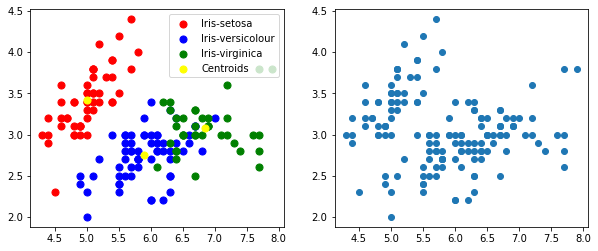

In [27]:
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
plt.scatter(df_arr[y_kmeans == 0, 0], df_arr[y_kmeans == 0, 1], 
            s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(df_arr[y_kmeans == 1, 0], df_arr[y_kmeans == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(df_arr[y_kmeans == 2, 0], df_arr[y_kmeans == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'yellow', label = 'Centroids')

plt.legend()
plt.subplot(1,2,2)
plt.scatter(df_arr[:,0],df_arr[:,1],marker='o')

### **Thank You**